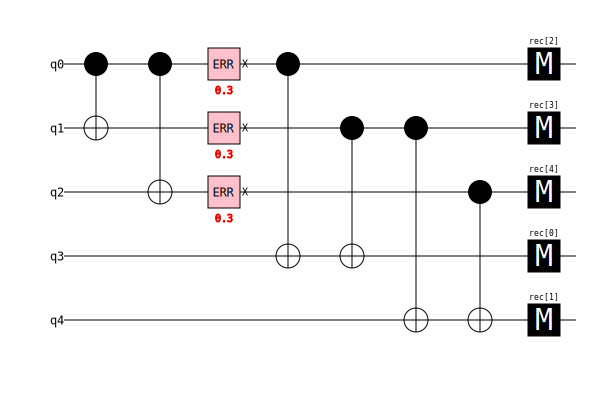

In [1]:
import stim
import pymatching as pm
import numpy as np
from IPython.display import SVG, display, Math
import matplotlib.pyplot as plt
from typing import Counter
import sys, os; sys.path.append(os.path.abspath(".."))

# --- Parameters ---
chance = 0.3

# --- Build circuit (|0_L> for the 3-qubit repetition code) ---
circuit = stim.Circuit()
circuit.append("CNOT", [0, 1])         # encode: copy data 0 -> 1,2
circuit.append("CNOT", [0, 2])

# noise on data qubits (after encoding)
circuit.append("X_ERROR", [0, 1, 2], chance)

# parity checks onto ancillas q3 (for 0⊕1) and q4 (for 1⊕2)
circuit.append("CNOT", [0, 3])
circuit.append("CNOT", [1, 3])
circuit.append("CNOT", [1, 4])
circuit.append("CNOT", [2, 4])

# measure all qubits
circuit.append("M", [3,4,0,1,2])

# Show circuit diagram as SVG
SVG(str(circuit.diagram("timeline")))